In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# import original map file
instances = ['pga_475','pga_2475', 'sa02_475','sa02_2475','sa10_475','sa10_2475']
path_og = '/Users/kjohnson/GEM/HazardMosaic/global_map/2022-1/'
path_extr = '/Users/kjohnson/GEM/oq-mbtk/openquake/ghm/rasters/test-rasters/'



In [3]:
for sc in ['rock','vs30']:
    for inst in instances:
        if sc == 'rock':
            fi1 = os.path.join(path_og,'v2022_1_{}.csv'.format(inst))
            fi2 = os.path.join(path_extr,'{}_rock.csv'.format(inst))
        elif sc == 'vs30':
            fi1 = os.path.join(path_og,'vs30/v2022_1_{}_vs30.csv'.format(inst))
            fi2 = os.path.join(path_extr,'{}_vs30.csv'.format(inst))
        df1full = pd.read_csv(fi1, skiprows=1)
        df2full = pd.read_csv(fi2, skiprows=0)
        
        # check 1: are the zeros still zero (check absolute difference)
        key = df1full.keys()[2]
        df1z = df1full[df1full[key]== 0] 
        df2z = df2full[df1full[key]== 0] 
        df1z['raster_sample'] = df2z['SAMPLE_1']
        df1z['percent_diff'] = abs(df1z[key] - df2z['SAMPLE_1'])
        print('Maximum difference at zero: ',max(df1z['percent_diff']))

/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/1822709760.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1z['raster_sample'] = df2z['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/1822709760.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1z['percent_diff'] = abs(df1z[key] - df2z['SAMPLE_1'])


Maximum difference at zero:  0.0002359806239837
Maximum difference at zero:  4.79701629956253e-05
Maximum difference at zero:  1.95993125089444e-05
Maximum difference at zero:  0.0002450622851029
Maximum difference at zero:  0.0002666389045771
Maximum difference at zero:  5.22505342814839e-06
Maximum difference at zero:  4.24869285780005e-05
Maximum difference at zero:  8.1987627709168e-06
Maximum difference at zero:  0.0004413521673996
Maximum difference at zero:  0.0014611493097618
Maximum difference at zero:  9.98302784864791e-05
Maximum difference at zero:  0.0005707666277885


In [6]:
for sc in ['rock','vs30']:
    for inst in instances:
        if sc == 'rock':
            fi1 = os.path.join(path_og,'v2022_1_{}.csv'.format(inst))
            fi2 = os.path.join(path_extr,'{}_rock.csv'.format(inst))
        elif sc == 'vs30':
            fi1 = os.path.join(path_og,'vs30/v2022_1_{}_vs30.csv'.format(inst))
            fi2 = os.path.join(path_extr,'{}_vs30.csv'.format(inst))
        df1full = pd.read_csv(fi1, skiprows=1)
        df2full = pd.read_csv(fi2, skiprows=0)
        
        # check 2: percentage difference when it's not zero
        key = df1full.keys()[2]
        
        print(inst,sc, key)
        df1 = df1full[df1full[key]!= 0] 
        df2 = df2full[df1full[key]!= 0] 

        df1['raster_sample'] = df2['SAMPLE_1']
        df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100
        
        #selected_rows = df1[~df1['percent_diff'].isnull()]
        plt.loglog(df1[key], df1.percent_diff,'.')
        plt.loglog([0,1.75],[1,1],'r--',0.05,alpha=0.8)        
        plt.loglog([0.01,0.01],[min(df1.percent_diff),max(df1.percent_diff)],'r--')
        plt.xlabel('IML (g)')
        plt.ylabel('%-diff (orig-raster)/orig*100')
        name = inst+'-'+sc
        plt.title(name)
        plt.savefig(name+'.png')
        plt.clf()
        
        df1sub = df1[abs(df1['percent_diff']) >= 1]
        dfcp = df1sub[(df1sub.percent_diff>10) & (df1sub[key]>0.1)]
        
        print('number of concerning points: {}'.format(len(dfcp)))
        print(dfcp)
        df1sub.to_csv(name+'_diff_sub.csv')
        

pga_475 rock PGA-0.002105


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 0
Empty DataFrame
Columns: [lon, lat, PGA-0.002105, raster_sample, percent_diff]
Index: []
pga_2475 rock PGA-0.000404


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 0
Empty DataFrame
Columns: [lon, lat, PGA-0.000404, raster_sample, percent_diff]
Index: []
sa02_475 rock SA(0.2)-0.002105


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 0
Empty DataFrame
Columns: [lon, lat, SA(0.2)-0.002105, raster_sample, percent_diff]
Index: []
sa02_2475 rock SA(0.2)-0.000404


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 0
Empty DataFrame
Columns: [lon, lat, SA(0.2)-0.000404, raster_sample, percent_diff]
Index: []
sa10_475 rock SA(1.0)-0.002105


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 0
Empty DataFrame
Columns: [lon, lat, SA(1.0)-0.002105, raster_sample, percent_diff]
Index: []
sa10_2475 rock SA(1.0)-0.000404


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 0
Empty DataFrame
Columns: [lon, lat, SA(1.0)-0.000404, raster_sample, percent_diff]
Index: []
pga_475 vs30 PGA-0.002105


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 1
            lon     lat  PGA-0.002105  raster_sample  percent_diff
498943  79.4932  16.151      0.120783       0.094463     21.791471
pga_2475 vs30 PGA-0.000404


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 1
            lon     lat  PGA-0.000404  raster_sample  percent_diff
498943  79.4932  16.151      0.265717        0.21065      20.72423
sa02_475 vs30 SA(0.2)-0.002105


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 1
            lon     lat  SA(0.2)-0.002105  raster_sample  percent_diff
498943  79.4932  16.151          0.226829         0.1667     26.508597
sa02_2475 vs30 SA(0.2)-0.000404


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 2
            lon     lat  SA(0.2)-0.000404  raster_sample  percent_diff
498943  79.4932  16.151          0.474082       0.385990     18.581677
652571  -2.4005  31.594          0.164141       0.181886     10.810987
sa10_475 vs30 SA(1.0)-0.002105


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 0
Empty DataFrame
Columns: [lon, lat, SA(1.0)-0.002105, raster_sample, percent_diff]
Index: []
sa10_2475 vs30 SA(1.0)-0.000404


/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raster_sample'] = df2['SAMPLE_1']
/var/folders/jv/qv3l5v7n0dl7fsfn92qt8k340000gn/T/ipykernel_59419/3838776444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percent_diff'] = abs(df1[key] - df2['SAMPLE_1'])/df1[key]*100


number of concerning points: 2
            lon      lat  SA(1.0)-0.000404  raster_sample  percent_diff
336505  83.2998  30.2432          0.195428       0.218162     11.632818
498943  79.4932  16.1510          0.108479       0.071973     33.652106


<Figure size 432x288 with 0 Axes>

In [7]:
df1sub[(df1sub.percent_diff>10) & (df1sub[key]>0.1)].to_csv('sa02_2475_vs30_concerning-pts.csv',index=None)



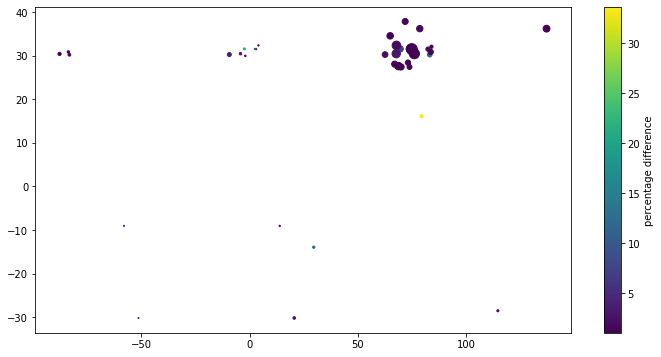

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df1sub.lon, df1sub.lat, s=100*df1sub[key], c=df1sub.percent_diff)
#plt.scatter(df1.lon, df1.lat, c=df1.percent_diff)
plt.colorbar(label='percentage difference')